#### -  Visualizing feature maps
#### - Datasets used : cat vs dog(colored)    ,    mnist digits(gray_scale)
####  ----------------------------------------------------------

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.optimizers import Adam

In [271]:
data_path = '../6DSprojects/dataset/training_set/'

In [272]:
datagen = ImageDataGenerator(rescale=1./255,shear_range=0.3,horizontal_flip=4,zoom_range=0.2)

In [341]:
import random,os
rand_img = random.choice(os.listdir('../6DSprojects/dataset/test_set/cats/'))
img = np.expand_dims(plt.imread(f'../6DSprojects/dataset/test_set/cats/{rand_img}'),0)

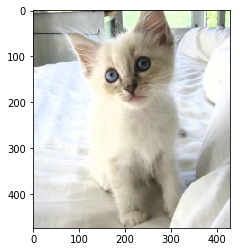

In [342]:
plt.imshow(img[0])
plt.show()

In [343]:
aug_iter = datagen.flow(img)
aug_imgs = [aug_iter.next()[0] for img in range(10)]

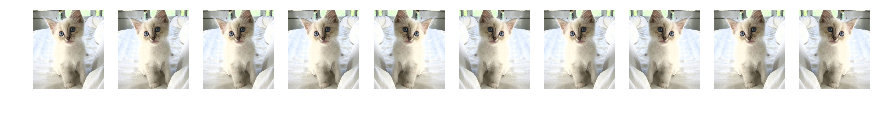

In [344]:
fig = plt.figure(figsize=(15,15))
for i in range(10):
    fig.add_subplot(1,10,i+1)
    plt.imshow(aug_imgs[i])
    plt.axis('off')
plt.show()

In [345]:
datagen = ImageDataGenerator(rescale=1./255,shear_range=0.3,horizontal_flip=4,validation_split=0.3)

In [349]:
train_batches = datagen.flow_from_directory(data_path,target_size=(224,224),classes=['cats','dogs'],batch_size=32,subset='training',shuffle=True)

Found 5600 images belonging to 2 classes.


In [350]:
val_batches = datagen.flow_from_directory(data_path,target_size=(224,224),classes=['cats','dogs'],subset='validation',batch_size=32,shuffle=True)

Found 2400 images belonging to 2 classes.


## model

In [358]:
# model = Sequential()

# model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=train_batches.image_shape))
# model.add(MaxPool2D(pool_size=(2,2),strides=2))

# model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2),strides=2))


# model.add(Dropout(0.3))

# model.add(Flatten())

# model.add(Dense(128,activation='relu'))
# model.add(Dense(64,activation='relu'))
# model.add(Dense(2,activation='softmax'))

In [366]:
mobile = keras.applications.mobilenet.MobileNet(weights=None)
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [409]:
output

<KerasTensor: shape=(None, 1024) dtype=float32 (created by layer 'flatten_6')>

In [426]:
x = mobile.layers[-18].output

output = Flatten()(x)
output = Dropout(0.4)(output)
output = Dense(units=2,activation='softmax')(output)

model = Model(inputs=mobile.input,outputs=output)

In [427]:
model.summary()

Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                   

In [431]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [432]:
hist = model.fit(x=train_batches,validation_data=val_batches,epochs=5)

Epoch 1/5
175/175 [==============================] - 511s 3s/step - loss: 2.0144 - acc: 0.5757 - val_loss: 1.5522 - val_acc: 0.5000
Epoch 2/5
175/175 [==============================] - 506s 3s/step - loss: 1.1035 - acc: 0.5980 - val_loss: 0.8501 - val_acc: 0.5000
Epoch 3/5
175/175 [==============================] - 508s 3s/step - loss: 0.8237 - acc: 0.6438 - val_loss: 0.9832 - val_acc: 0.5346
Epoch 4/5
175/175 [==============================] - 506s 3s/step - loss: 0.7153 - acc: 0.6723 - val_loss: 0.7952 - val_acc: 0.6538
Epoch 5/5
175/175 [==============================] - 515s 3s/step - loss: 0.6558 - acc: 0.6982 - val_loss: 0.7142 - val_acc: 0.6521


## Visualizing feature maps (convolved images)

### ---------------------------------- Two methods ------------------------------------------

### 1-Creating simple model with layer 'x' conv. as output

In [436]:
fm_model1 = Model(inputs=model.input,outputs=model.layers[1].output)

In [455]:
fm_model1.summary()

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
Total params: 864
Trainable params: 864
Non-trainable params: 0
_________________________________________________________________


In [452]:
fm1 = fm_model1.predict(np.expand_dims(train_batches.next()[0][0],0))

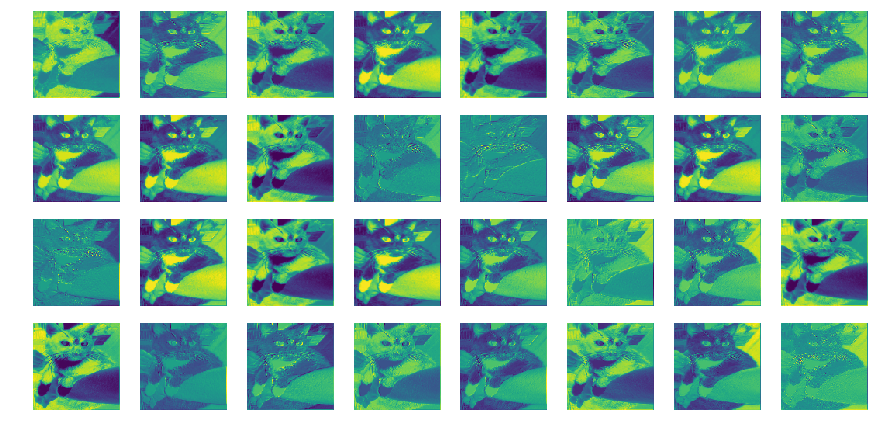

conv. layer 1 feature map


In [525]:
c = 0
fig = plt.figure(figsize=(15,15))
for i in range(8):
    for k in range(4):
        fig.add_subplot(8,8,c+1)
        plt.imshow(fm1[0][:,:,c])
        plt.axis('off')
        c+=1
plt.show()
print(f'conv. layer 1 feature map')

### 2- Evaluate specific nodes in your computational graph, given a specific set of inputs

In [479]:
from keras import backend as k
fm_model2 = k.function([model.input],[model.layers[2].output])
fm_model2

<function keras.backend.function.<locals>.func(model_inputs)>

In [499]:
fm2 = fm_model2(np.expand_dims(train_batches.next()[0][0],0))
fm2[0][0].shape

(112, 112, 32)

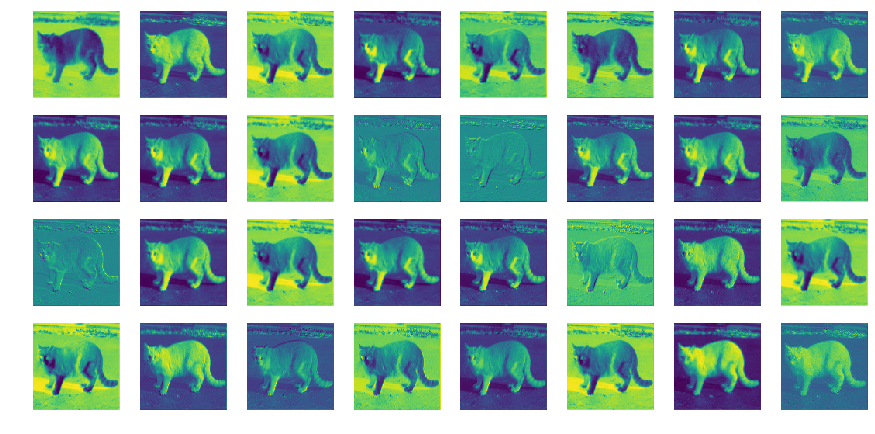

conv. layer 1 feature map


In [524]:
c = 0
fig = plt.figure(figsize=(15,15))
for i in range(8):
    for k in range(4):
        fig.add_subplot(8,8,c+1)
        plt.imshow(fm2[0][0][:,:,c])
        plt.axis('off')
        c+=1
plt.show()
print(f'conv. layer 1 feature map')

In [516]:
fm_model3 = k.function([model.input],[model.layers[7].output])

fm3 = fm_model3(np.expand_dims(train_batches.next()[0][0],0))

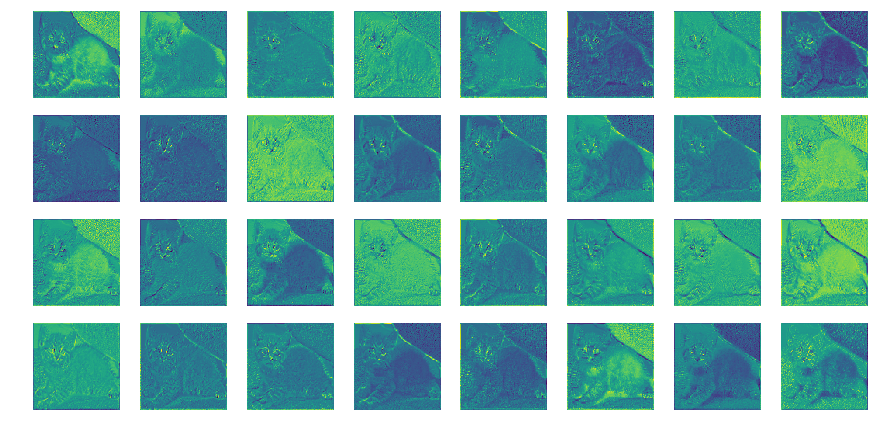

conv. layer 2 feature map


In [523]:
c = 0
fig = plt.figure(figsize=(15,15))
for i in range(8):
    for k in range(4):
        fig.add_subplot(8,8,c+1)
        plt.imshow(fm3[0][0][:,:,c])
        plt.axis('off')
        c+=1
plt.show()
print(f'conv. layer 2 feature map')

### --------------------------------------------------------------------------------------------------------

In [1]:
import idx2numpy
import matplotlib.pyplot as plt
import numpy as np

In [16]:
import keras
from keras.utils import np_utils

In [156]:
train_img = 'mnist/files/train-images.idx3-ubyte'
train_label = 'mnist/files/train-labels.idx1-ubyte'
test_img = 'mnist/files/t10k-images.idx3-ubyte'
test_label = 'mnist/files/t10k-labels.idx1-ubyte'

In [157]:
x_train,x_test = idx2numpy.convert_from_file(train_img),idx2numpy.convert_from_file(test_img)
y_train,y_test = idx2numpy.convert_from_file(train_label),idx2numpy.convert_from_file(test_label)

In [158]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [159]:
x_train = x_train/255.0
x_test  = x_test/255.0

In [160]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [161]:
y_train,y_test = np_utils.to_categorical(y_train),np_utils.to_categorical(y_test)

In [162]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [163]:
x_train.shape

(60000, 28, 28, 1)

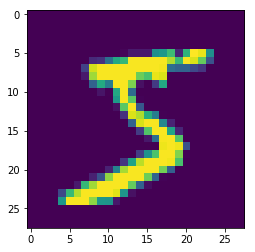

In [164]:
plt.imshow(x_train[0].reshape(28,28))

In [165]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=x_train[0].shape,name='block1'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=64,kernel_size=3,activation='relu',name='block2'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [166]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1 (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 block2 (Conv2D)             (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 5, 5, 64)          0         
                                                                 
 flatten_3 (Flatten)         (None, 1600)             

In [167]:
class CustomCallBack(tf.keras.callbacks.Callback):
    def on_train_end(self,logs={}):
        print(f'training ended with acc : ',logs['acc'])
        return
    
    
custom_callback = CustomCallBack()

In [168]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['acc'])

In [169]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=5,batch_size=32,verbose=1,callbacks=[custom_callback])

Epoch 1/5
1875/1875 [==============================] - 27s 13ms/step - loss: 0.1385 - acc: 0.9582 - val_loss: 0.0535 - val_acc: 0.9817
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0473 - acc: 0.9852 - val_loss: 0.0366 - val_acc: 0.9885
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0329 - acc: 0.9896 - val_loss: 0.0284 - val_acc: 0.9901
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0255 - acc: 0.9918 - val_loss: 0.0249 - val_acc: 0.9924
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0205 - acc: 0.9938 - val_loss: 0.0283 - val_acc: 0.9910
training ended with acc :  0.9937833547592163


In [170]:
model.layers[0].output_shape

(None, 26, 26, 32)

In [179]:
model2 = Model(inputs=model.input,outputs=model.layers[0].output)

In [185]:
f_map = model2.predict(x_test[0].reshape(1,28,28,1))
f_map.shape

(1, 26, 26, 32)

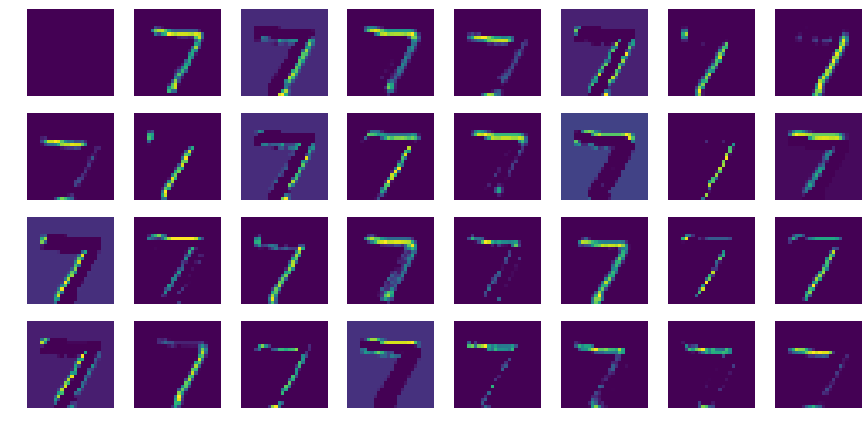

In [252]:
c = 0
fig = plt.figure(figsize=(15,15))
for i in range(8):
    for k in range(4):
        fig.add_subplot(8,8,c+1)
        plt.imshow(f_map[0][:,:,c])
        plt.axis('off')
        c+=1
plt.show()

In [214]:
ixs = [0,1,2,3]
outputs = [model.layers[layer].output for layer in ixs]

model3 = Model(inputs=model.input,outputs=outputs)
model3.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 block1 (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 block2 (Conv2D)             (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
Total params: 18,816
Trainable params: 18,816
Non-trainable

In [221]:
f_maps = model3.predict(x_test[0].reshape(1,28,28,1))

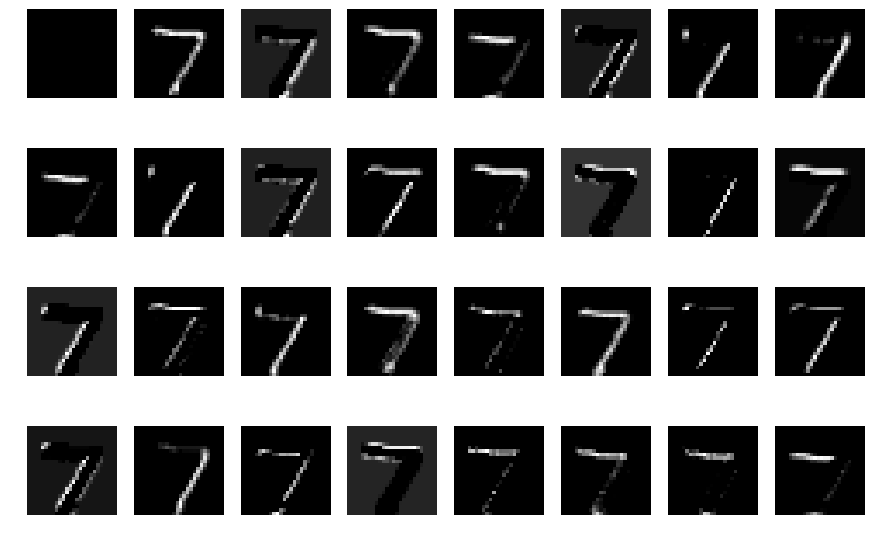

layer 1 feature map


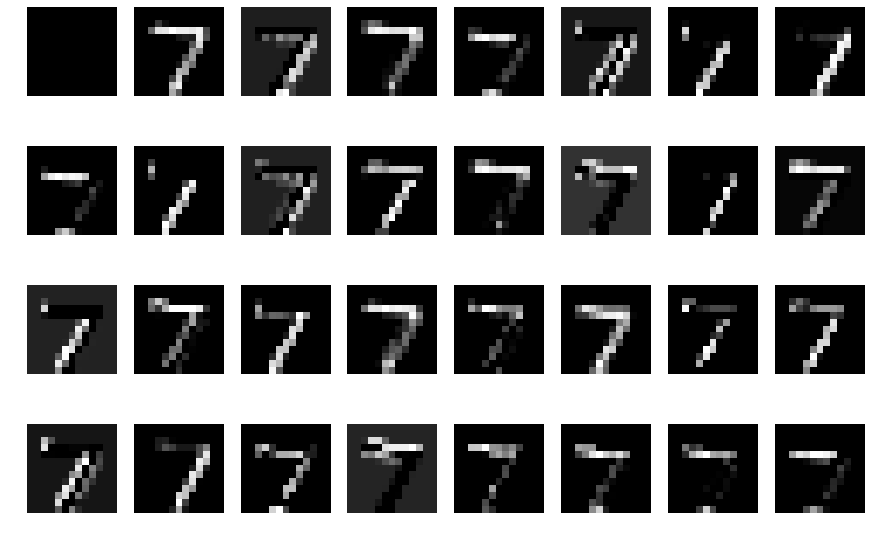

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


layer 2 feature map


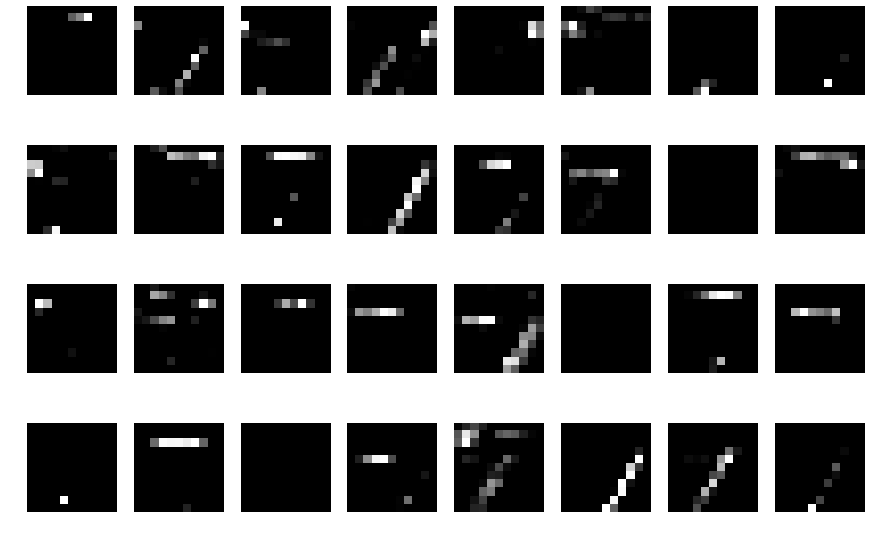

layer 3 feature map


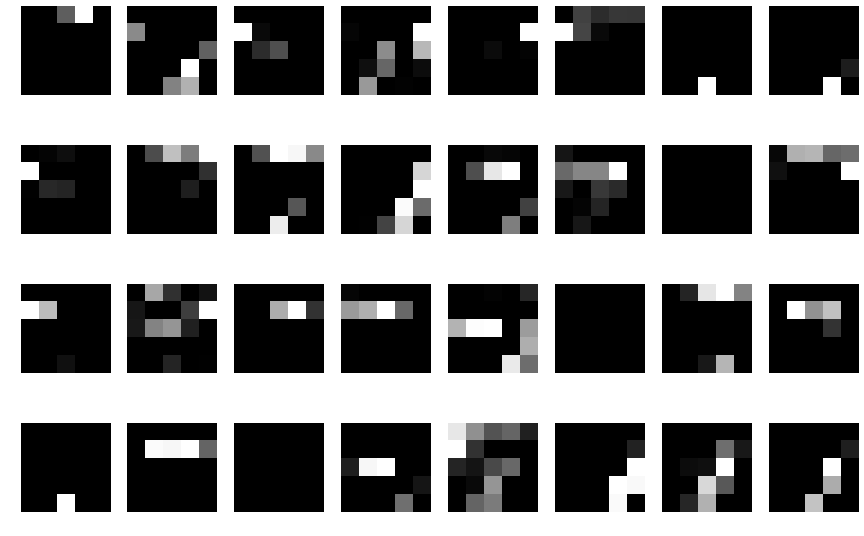

layer 4 feature map


In [270]:
for fmap in f_maps:
    fig = plt.figure(figsize=(15,20))
    
    c = 0
    for i in range(8):
        for k in range(4):
            fig.add_subplot(8,8,c+1)
            plt.imshow(fmap[0][:,:,c],cmap='gray')
            plt.axis('off')
            c+=1        
    plt.show()
    print(f'layer {f_maps.index(fmap)+1} feature map')